
# Project 2: IMDB Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>When a movie is released, early data can influence a consumers decision to see the film or not. The largest movie database is undoubtedly IMDb. There have been criticisms of IMDb's ranking system, because they do not allow votes from 'non-regular' users to influence the average that ultimately determines the film's overall ranking in the top 250 films.

>When observing the raw data it appears that many unpopular films have the highest rating. IMDb has taken the initiative to include a minimum number of ratings from regular users before the film is included in the 'top films' list. The amount of votes required for a voter to become a 'regular' user is undisclosed in an effort to prevent any manipulation of the rating sytem. Additionally IMDb requires a minimum of 25,000 votes from regular users for a film to place rank.

>This analysis explores the following questions:
 
   + What are the top 10 movies based on vote average in this data set? By Revenue?
   + Which genre has the highest rating on average?
   + In the last 10 years of this data set, which year had the highest revenue? Which year had the highest revenue proportional to the number of films released?
   + Of the highest grossing year overall, and the proportionally highest grossing year of the last decade, which films had the highest revenue, and how do they compare to those with the highest rating? 
   + Does there appear to be a recency bias (i.e. Are newer movies getting consistently higher or lower ratings on average)?
   

In [168]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

<a id='wrangling'></a>
## Data Wrangling

>The dataframe can be cleaned and adjusted for readability, and to accomodate the specific questions explored in the analysis. In order to make the data most accurately represent the IMDb ranking standards, films with a low number of ratings should be removed entirely. Once this is complete the necessity of the column data should be evaluated. Since the report is investigating movie data based on vote average, genres, revenue adjusted for inflation, and release year, these columns should be kept for sorting and plotting. Everything else can be removed. 

>Additionally, the way genres are recorded in the initial data is not ideal for an analysis on average score of a given genre. Genres containing multiple types are renamed to include only one genre-type for easy of sorting and to ensure that no film is counted twice in the analysis.

#### Load the IMDb movie data
+ Use pandas .read_csv() function.
+ Use .head() to display first few rows of data

In [169]:
db=pd.read_csv("tmdbmovies.csv")
db.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


#### Get an overview of the information provided by Data
+ Use the .info() and .describe() functions to get a summary of column names, rows, and data types, as well as basic statistical data.

In [170]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [171]:
db.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Based on this information, the minimum vote count is very low. Remove rows with a low vote count (Less than 1,000) to mimic the IMDb "Vote Minimum" requirement. 

In [172]:
db=db.query('vote_count >= 1000')
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 10594
Data columns (total 21 columns):
id                      564 non-null int64
imdb_id                 564 non-null object
popularity              564 non-null float64
budget                  564 non-null int64
revenue                 564 non-null int64
original_title          564 non-null object
cast                    564 non-null object
homepage                389 non-null object
director                564 non-null object
tagline                 556 non-null object
keywords                562 non-null object
overview                564 non-null object
runtime                 564 non-null int64
genres                  564 non-null object
production_companies    564 non-null object
release_date            564 non-null object
vote_count              564 non-null int64
vote_average            564 non-null float64
release_year            564 non-null int64
budget_adj              564 non-null float64
revenue_adj     

>Remove any columns with data that will not be used in this analysis

In [173]:
db=db.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'popularity', 'production_companies', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1)
db.head(3)

,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,6.3,2015


>Since a lot of work will be done with the genre category, genres are reassigned into 1 of 8 genre categories using .str_contains()

In [174]:
db.loc[db['genres'].str.contains('Drama', case=False), 'genres' ]= 'Drama'
db.loc[db['genres'].str.contains('Comedy', case=False), 'genres' ]= 'Comedy'
db.loc[db['genres'].str.contains('Science Fiction', case=False), 'genres' ]= 'Science Fiction'
db.loc[db['genres'].str.contains('Thriller', case=False), 'genres' ]= 'Thriller'
db.loc[db['genres'].str.contains('Horror', case=False), 'genres' ]= 'Horror'
db.loc[db['genres'].str.contains('Action',case=False), 'genres' ]= 'Action/Adventure',
db.loc[db['genres'].str.contains('Adventure',case=False), 'genres' ]= 'Action/Adventure',
db.loc[db['genres'].str.contains('Romance', case=False), 'genres' ]= 'Rom-Com'
db.loc[db['genres'].str.contains('Animation', case=False), 'genres' ]= 'Animation'
db.loc[db['genres'].str.contains('Family', case=False), 'genres' ]= 'Family'
db.loc[db['genres'].str.contains('Fantasy', case=False), 'genres' ]= 'Fantasy'
db.head(5)

,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,6/9/2015,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Science Fiction,5/13/2015,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,119,Science Fiction,3/18/2015,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Science Fiction,12/15/2015,7.5,2015
4,190000000,1506249360,Furious 7,James Wan,137,Thriller,4/1/2015,7.3,2015


#### Sort the data by the highest average vote
+ sort the list in descending order so the highest average vote appears at the top of the data

In [175]:
db=db.sort_values(by=['vote_average'], ascending=False)
db.head(10)

,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
4178,25000000,28341469,The Shawshank Redemption,Frank Darabont,142,Drama,9/10/1994,8.4,1994
7269,6000000,245066411,The Godfather,Francis Ford Coppola,175,Drama,3/15/1972,8.3,1972
650,3300000,13993093,Whiplash,Damien Chazelle,105,Drama,10/10/2014,8.2,2014
4177,8000000,213928762,Pulp Fiction,Quentin Tarantino,154,Thriller,10/14/1994,8.1,1994
4179,55000000,677945399,Forrest Gump,Robert Zemeckis,142,Drama,7/6/1994,8.1,1994
2875,185000000,1001921825,The Dark Knight,Christopher Nolan,152,Drama,7/16/2008,8.1,2008
10222,22000000,321265768,Schindler's List,Steven Spielberg,195,Drama,11/29/1993,8.1,1993
9758,13000000,47542841,The Godfather: Part II,Francis Ford Coppola,200,Drama,12/20/1974,8.1,1974
2409,63000000,100853753,Fight Club,David Fincher,139,Drama,10/14/1999,8.1,1999
7309,18000000,538400000,The Empire Strikes Back,Irvin Kershner,124,Science Fiction,1/1/1980,8.0,1980


>Adjust the revenue column to show a decimal of revenue in millions

In [176]:
db.loc[:,'revenue'] /=10000000

In [177]:
db.head(5)

,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
4178,25000000,2.834147,The Shawshank Redemption,Frank Darabont,142,Drama,9/10/1994,8.4,1994
7269,6000000,24.506641,The Godfather,Francis Ford Coppola,175,Drama,3/15/1972,8.3,1972
650,3300000,1.399309,Whiplash,Damien Chazelle,105,Drama,10/10/2014,8.2,2014
4177,8000000,21.392876,Pulp Fiction,Quentin Tarantino,154,Thriller,10/14/1994,8.1,1994
4179,55000000,67.794540,Forrest Gump,Robert Zemeckis,142,Drama,7/6/1994,8.1,1994


In [178]:
imdb=db.reset_index()

In [179]:
imdb.to_csv('imdb.csv')

<a id='eda'></a>
## Exploratory Data Analysis

### Questions 1:
 + a.What are the top 10 movies in this database based on vote average?
 + b.What are the top 10 movies with the highest revenue?

>This is just a simple matter of sorting the cleaned data appropriately to display the answers. Listing the first 10 provides the 10 highest rated movies since the data was intended to be sorted this way.

In [180]:
imdb.head(10)

,index,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
0,4178,25000000,2.834147,The Shawshank Redemption,Frank Darabont,142,Drama,9/10/1994,8.4,1994
1,7269,6000000,24.506641,The Godfather,Francis Ford Coppola,175,Drama,3/15/1972,8.3,1972
2,650,3300000,1.399309,Whiplash,Damien Chazelle,105,Drama,10/10/2014,8.2,2014
3,4177,8000000,21.392876,Pulp Fiction,Quentin Tarantino,154,Thriller,10/14/1994,8.1,1994
4,4179,55000000,67.794540,Forrest Gump,Robert Zemeckis,142,Drama,7/6/1994,8.1,1994
5,2875,185000000,100.192183,The Dark Knight,Christopher Nolan,152,Drama,7/16/2008,8.1,2008
6,10222,22000000,32.126577,Schindler's List,Steven Spielberg,195,Drama,11/29/1993,8.1,1993
7,9758,13000000,4.754284,The Godfather: Part II,Francis Ford Coppola,200,Drama,12/20/1974,8.1,1974
8,2409,63000000,10.085375,Fight Club,David Fincher,139,Drama,10/14/1999,8.1,1999
9,7309,18000000,53.840000,The Empire Strikes Back,Irvin Kershner,124,Science Fiction,1/1/1980,8.0,1980


>The results here make sense. Based on my own knowlede of movies these are popular well made films, many of which have oscars. To check my work I referenced imdb.com to see if their data differed, the listed the top 10 movies as:

           + The Shawshank redemption
           + The Godfather
           + The Dark Knight
           + The Godfather: pt. II
           + LOTR: Return of the King
           + Pulp Fiction
           + Schindler's List 
           + 12 Angry Men
           + Inception
           + Fight Club

> So there are some discrepancies which could be caused by a variety of things,a major factor being the age of the data. There is no information beyond  2015.

To adress the revenue part of question 1 the data can be resorted easily.

In [181]:
imdb_rev=imdb.sort_values(by=['revenue'], ascending=False)
imdb_rev.head(10)

,index,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
222,1386,237000000,278.150585,Avatar,James Cameron,162,Science Fiction,12/10/2009,7.1,2009
109,3,200000000,206.817823,Star Wars: The Force Awakens,J.J. Abrams,136,Science Fiction,12/15/2015,7.5,2015
149,5231,200000000,184.503419,Titanic,James Cameron,194,Drama,11/18/1997,7.3,1997
140,4361,220000000,151.955791,The Avengers,Joss Whedon,143,Science Fiction,4/25/2012,7.3,2012
355,0,150000000,151.352881,Jurassic World,Colin Trevorrow,124,Science Fiction,6/9/2015,6.5,2015
142,4,190000000,150.624936,Furious 7,James Wan,137,Thriller,4/1/2015,7.3,2015
130,14,280000000,140.503577,Avengers: Age of Ultron,Joss Whedon,141,Science Fiction,4/22/2015,7.4,2015
64,3374,125000000,132.781782,Harry Potter and the Deathly Hallows: Part 2,David Yates,130,Action/Adventure,7/7/2011,7.7,2011
101,5422,150000000,127.421901,Frozen,Chris Buck|Jennifer Lee,102,Action/Adventure,11/27/2013,7.5,2013
255,5425,200000000,121.543999,Iron Man 3,Shane Black,130,Science Fiction,4/18/2013,6.9,2013


>Data here appears accurate--- but I decided to compare to IMDb again to make sure I am on the right path.

>IMDb lists the top 10 films by revenue are:

    + Avatar
    + Titanic
    + Star Wars
    + Jurassic World
    + The Avengers
    + Furious 7 
    + Avengers: Age of Ultron
    + Harry Potter and the Deathly Hallows: Pt. 2
    + Frozen
    + Iron Man 3
    
 >There are still some discrepancies between my DataFrame and the IMDb data, but this is close enough that I can assume the data I have has been sorted correctly.

### Questions 2:
 + Which genre has the highest rating on average?

>.groupby() can provide information about the highest rated 
genres and help visualize it.

In [182]:
imdb.groupby('genres').mean()['vote_average']

genres
Action/Adventure    6.732787
Animation           6.892308
Comedy              6.620536
Drama               7.145503
Horror              6.280000
Rom-Com             6.966667
Science Fiction     6.583051
Thriller            6.636508
Name: vote_average, dtype: float64

>This give a clear picture of the highest rated genres, but things always look better in color

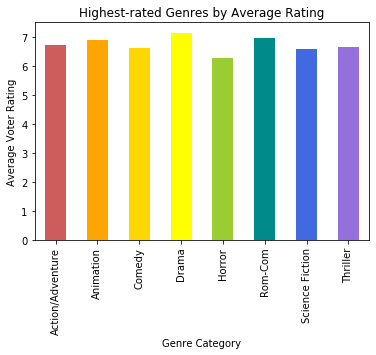

In [183]:
rbw=['indianred', 'orange', 'gold', 'yellow', 'yellowgreen','darkcyan', 'royalblue', 'mediumpurple', 'mediumorchid','purple']
mono=['darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'cadetblue','c', 'darkturquoise', 'mediumturquoise', 'aqua', 'paleturquoise']
    
    
imdb.groupby('genres')['vote_average'].mean().plot(kind='bar', title='Highest-rated Genres by Average Rating', color=rbw)
plt.xlabel('Genre Category')
plt.ylabel('Average Voter Rating');

>The plot makes it easier to determine that Drama has the highest rating followed by Rom-Com (who knew!?) and Animation

### Questions 3:
 + a. In the last 10 years of this data set, which year had the highest revenue?
 + b. Which year had the highest revenue proportional to the number of films released?

>Create a new dataframe that shows the average revenue per year, over the last decade of data

In [184]:
decade=imdb.query('release_year > 2005')
decade_avg=decade.groupby('release_year', as_index=False)['revenue'].mean()
decade_avg.head(10)

,release_year,revenue
0,2006,38.435533
1,2007,45.680348
2,2008,40.491300
3,2009,51.694984
4,2010,38.863641
5,2011,35.507864
6,2012,39.880861
7,2013,29.573182
8,2014,31.286511
9,2015,42.287208


>Visualize the data with another simple Bar chart:

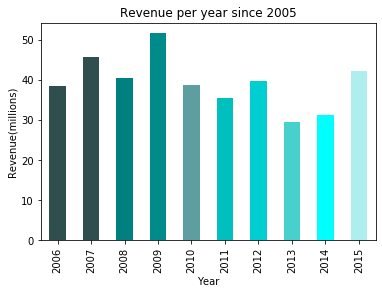

In [185]:
decade_avg.groupby('release_year')['revenue'].mean().plot(kind='bar', title='Revenue per year since 2005', color=mono)
plt.xlabel('Year')
plt.ylabel('Revenue(millions)');

>Looks like 2009 was a big year, but before moving on to question 4 I would like to make sure that 2009 had the highest revenue proportional to the number of films released.

>Create an array of the average revenue per release year

In [186]:
revenue_yr=decade.groupby('release_year').mean()['revenue']
revenue_yr

release_year
2006    38.435533
2007    45.680348
2008    40.491300
2009    51.694984
2010    38.863641
2011    35.507864
2012    39.880861
2013    29.573182
2014    31.286511
2015    42.287208
Name: revenue, dtype: float64

>Create a second array of the number of films released each year

In [187]:
count_yr=decade.groupby('release_year').count()['revenue']
count_yr

release_year
2006    17
2007    20
2008    21
2009    25
2010    34
2011    39
2012    47
2013    64
2014    57
2015    48
Name: revenue, dtype: int64

>Divide the average revenue by the count of films to get the proportional value for each year.
>I have decided to create my own function called proportion() to clean up my coding. 

In [188]:
def proportion(year): ### year is the required argument
    return revenue_yr[year]/count_yr[year]  ### Since revenue_yr and count_yr were defined earlier the return value will be
                                            ###the revenue of the input year divided by the count of the input year. Providing the
                                            ###proportional data needed to plot correctly.

>Test the function to make sure it works correctly

In [189]:
sixpro=proportion(2006)
sixpro

2.2609136788927335

>Create a list called proportion_value using the user created function proportion:

In [190]:
years=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
proportion_value=proportion(years)

In [191]:
proportion_value

release_year
2006    2.260914
2007    2.284017
2008    1.928157
2009    2.067799
2010    1.143048
2011    0.910458
2012    0.848529
2013    0.462081
2014    0.548886
2015    0.880984
Name: revenue, dtype: float64

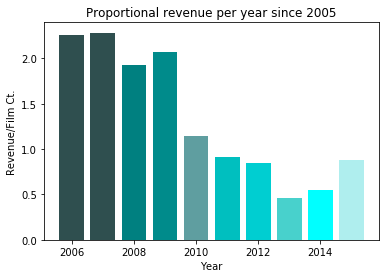

In [192]:
plt.bar(years, proportion_value, color=mono)
plt.title('Proportional revenue per year since 2005')
plt.xlabel('Year')
plt.ylabel('Revenue/Film Ct.');

>Proportionally 2007 had higher revenue than 2009

### Questions 4:
 + In this year, what are the top 5 films by revenue and what are their ratings? What are the top 5 films by rating, and what is their revenue? Is there any overlap?

### 2007 Comparisons

>Visualize the rating and revenue of the highest grossing films of 2007

In [193]:
year2007=decade.query('release_year == 2007')
year2007=year2007.sort_values(by='revenue', ascending=False)
year2007=year2007.head(5)
year2007

,index,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
287,7387,300000000,96.100000,Pirates of the Caribbean: At World's End,Gore Verbinski,169,Action/Adventure,5/19/2007,6.8,2007
186,7388,150000000,93.821274,Harry Potter and the Order of the Phoenix,David Yates,138,Action/Adventure,6/28/2007,7.2,2007
518,7394,258000000,89.087163,Spider-Man 3,Sam Raimi,139,Action/Adventure,5/1/2007,5.8,2007
520,7411,160000000,79.895816,Shrek the Third,Chris Miller|Raman Hui,93,Comedy,5/17/2007,5.8,2007
330,7474,150000000,70.970978,Transformers,Michael Bay,144,Science Fiction,6/27/2007,6.6,2007


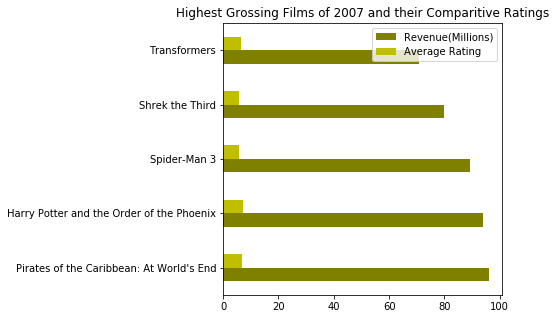

In [194]:
year2007.plot.barh(x='original_title', y=['revenue','vote_average'], color=['olive', 'y'], figsize=(5,5))
plt.title('Highest Grossing Films of 2007 and their Comparitive Ratings')
plt.ylabel('')
plt.legend(['Revenue(Millions)', 'Average Rating'], loc="best");

>Classic example that the general public's liklihood to go see a movie doesn't indicate how good or bad it must be. Shrek the third has a 5.8, a glorified D- according to the letter grade scale.

>Visualize the rating and revenue of the highest rated films of 2007

In [195]:
year2007rating=decade.query('release_year == 2007')
year2007rating=year2007rating.head(5)
year2007rating

,index,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
61,7400,15000000,5.625514,Into the Wild,Sean Penn,148,Drama,9/11/2007,7.7,2007
76,7391,25000000,17.160000,No Country for Old Men,Joel Coen|Ethan Coen,122,Drama,11/8/2007,7.6,2007
168,7389,150000000,62.372282,Ratatouille,Brad Bird|Jan Pinkava,111,Comedy,6/22/2007,7.3,2007
170,7390,70000000,44.282414,The Bourne Ultimatum,Paul Greengrass,115,Drama,8/3/2007,7.2,2007
173,7410,0,8.057377,Hot Fuzz,Edgar Wright,121,Comedy,2/14/2007,7.2,2007


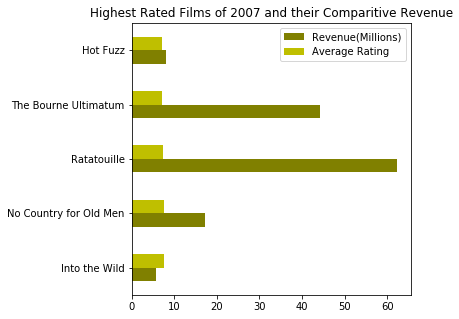

In [196]:
year2007rating.plot.barh(x='original_title', y=['revenue','vote_average'], color=['olive', 'y'], figsize=(5,5))
plt.title('Highest Rated Films of 2007 and their Comparitive Revenue')
plt.ylabel('')
plt.legend(['Revenue(Millions)', 'Average Rating'], loc="best");

>This supports the thought that regular voters, perhaps those who influence film awards, tend to give high marks to films that are less popular and may not forge high revenue.

### 2009 Comparisons

>Visualize the rating and revenue of the highest grossing films of 2007

In [197]:
year2009=decade.query('release_year == 2009')
year2009=year2009.sort_values(by='revenue', ascending=False)
year2009=year2009.head(5)
year2009

,index,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
222,1386,237000000,278.150585,Avatar,James Cameron,162,Science Fiction,12/10/2009,7.1,2009
158,1389,250000000,93.395920,Harry Potter and the Half-Blood Prince,David Yates,153,Action/Adventure,7/7/2009,7.3,2009
392,1396,90000000,88.668682,Ice Age: Dawn of the Dinosaurs,Carlos Saldanha,94,Comedy,6/29/2009,6.4,2009
496,1487,150000000,83.629723,Transformers: Revenge of the Fallen,Michael Bay,150,Science Fiction,6/19/2009,6.0,2009
537,1399,200000000,76.965360,2012,Roland Emmerich,158,Science Fiction,10/10/2009,5.6,2009


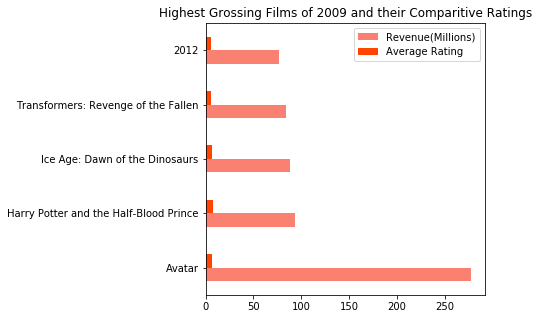

In [198]:
year2009.plot.barh(x='original_title', y=['revenue','vote_average'], color=['salmon', 'orangered'], figsize=(5,5))
plt.title('Highest Grossing Films of 2009 and their Comparitive Ratings')
plt.ylabel('')
plt.legend(['Revenue(Millions)', 'Average Rating'], loc="best");

>This data shows the same thing that the 2007 highest grossing film data shows, the movies that make the most money are rarely the highest rated. Although there are some higher rated films here, none of them appear in the highest rated films of 2009

>Visualize the rating and revenue of the highest grossing films of 2007

In [199]:
year2009rating=decade.query('release_year == 2009')
year2009rating=year2009rating.head(5)
year2009rating

,index,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
55,1387,70000000,31.913105,Inglourious Basterds,Quentin Tarantino,153,Drama,8/18/2009,7.7,2009
82,1390,175000000,73.134274,Up,Bob Peterson|Pete Docter,96,Comedy,5/13/2009,7.6,2009
123,1429,5000000,0.976010,Moon,Duncan Jones,97,Drama,6/12/2009,7.4,2009
154,1395,7500000,6.072273,(500) Days of Summer,Marc Webb,95,Drama,7/17/2009,7.3,2009
157,1391,150000000,38.568045,Star Trek,J.J. Abrams,127,Science Fiction,5/6/2009,7.3,2009


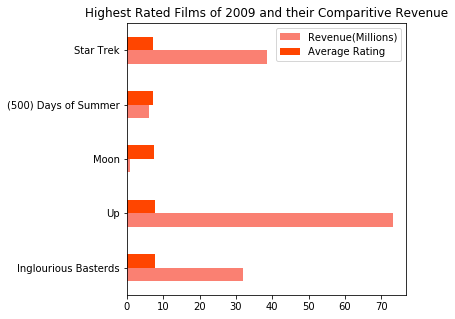

In [200]:
year2009rating.plot.barh(x='original_title', y=['revenue','vote_average'], color=['salmon', 'orangered'], figsize=(5,5))
plt.title('Highest Rated Films of 2009 and their Comparitive Revenue')
plt.ylabel('')
plt.legend(['Revenue(Millions)', 'Average Rating'], loc="best");

>Similar to 2007, the highest rated films do not align with those that make the most money. Personally, this has also supported my theory that I have 'good taste' in movies, since these 5 are among my favorites, and I could care less about the highest grossing films! 

### Question 4
####  Is there a recency bias? Do newer films have a significantly higher/lower vote average?

>A seaborn scatterplot with a line of best fit is used to visualize the relationship beween the number of films released in a particular year and the average rating.

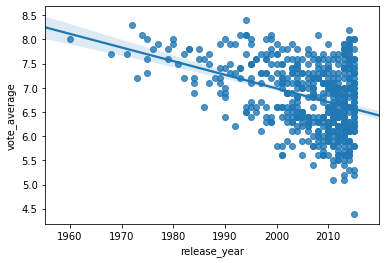

In [201]:
sns.regplot(imdb['release_year'],imdb['vote_average']);

> This plot implies that there may be a recency bias in that, newer films are critiqued more harshly. However, there are many variables that could impact the validity of the correlation (See limitations) 

<a id='conclusions'></a>
## Conclusions


In the last 10 years of this data set, which year had the highest revenue? Which year had the highest revenue proportional to the number of films released?
Of the highest grossing year overall, and the proportionally highest grossing year of the last decade, which films had the highest revenue, and how do they compare to those with the highest rating?
Does there appear to be a recency bias (i.e. Are newer movies getting consistently higher or lower ratings on average)?

>**Question 1:** When looking at the top 10 movies by voter average and revenue, the results from the data provided did not match the data from IMDBs website. This could be for a variety of reasons, most likely the data is outdated, and the way IMDb calculates the ranking allows for current films to initially score very high and later move down the list. I believe this is the case for the move 'Whiplash' being ranked so high in my data but not in the IMDb current list.

>**Question 2:** For the genre related question, the visualizations imply that Drama has the highest voter average. However, there could be discrepancies in how a film's genre is defined in reality. There could also be more eligible genre types that may make the data look significantly different. Additionally there are several films that could be defined as multiple generes, but were only counted once for this analysis. 

>**Question 3:** When the highest revenue was looked at as an overall total, the year 2009 had the highest value. When it was adjusted to a proportional value 2007 had the highest revenue. It could be implied that 2007 had a lot of 'blockbuster' films, whereas 2009 had a handful, but individually had a significantly higher gross. 

>**Question 4:** Looking at the data from question 3, I felt it was important to look at specific films in each year. From this I was able to see that Avatar came out in 2009. Based on the Data from question 1, Avatar is the highest grossing film overall so this aligns with why the data from 2009 has the total highest gross, but not the overall highest. 

>**Question 5:** The scatter plot and line of best fit make it appear that as more films are released the vote average declines, but we cannot assume why. There are too many factors that could be the cause for lower averages. For example, larger studio budgets allow for the production of more films, and therefore 'worse' films as far as quality. It could also be a change in the viewers- that is, more people have access to movies now, so they are ranking more films and with the larger pool of films, some may be ranked extrememly low.

### Limitations
  + There is no way to be sure that the data provided is complete
  + The ratings do not align with IMDb ratings, so there is no way to tell how the assigned values were calculated
  + There is a high chance of missing data, or innacurately labeled data
  + While the recency bias data looks like there is a correlation between more films, and lower ratings, it is highly possible that there are many films missing from the early years of the data
  + It is unclear whether or not the revenue has been adjusted for inflation? This could change the revenue and the rating analysis 
  

### Resources
>
+ https://www.data-to-viz.com/#scatter
+ http://python-graph-gallery.com/scatter-plot/
+ https://stackoverflow.com/
+ https://pandas.pydata.org/pandas-docs/stable/genindex.html